## Notebook del capítulo 5

In [1]:
# 22/5/24
import numpy as np
import matplotlib.pyplot as plt

### Ejemplo 1

In [2]:
# Datos
xn= np.array([0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 1.00])
yn= np.array([1.00, 1.64, 1.51, 2.03, 2.75, 3.59, 4.87, 5.23, 5.44, 6.37])

Text(0, 0.5, '$v$ [m/s]')

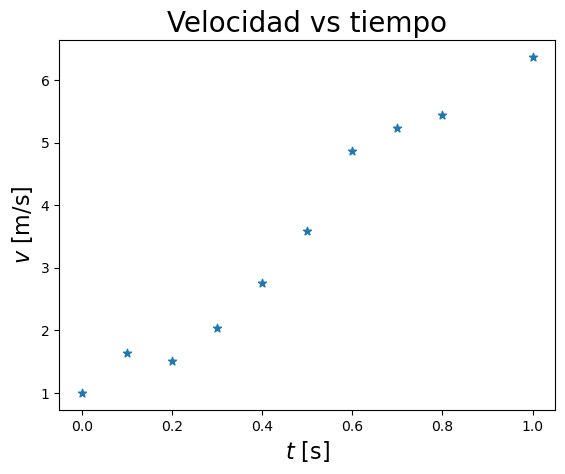

In [3]:
plt.scatter(xn, yn, marker='*') 
plt.title(r'Velocidad vs tiempo', fontsize=20) 
plt.xlabel(r'$t$ [s]', fontsize=16)
plt.ylabel(r'$v$ [m/s]', fontsize=16)

In [4]:
# Se obtiene el valor de n (numero de datos)
n = len(xn)
# Las sumatorias necesarias 
Sum_x = np.sum(xn)
Sum_y = np.sum(yn)
Sum_xx = np.sum(xn**2)
Sum_xy = np.sum(xn*yn)
Sum_xSumy = np.sum(xn)*np.sum(yn)
Delta = n*np.sum(xn**2) - (np.sum(xn))**2
print(n,',', Sum_x, ',',Sum_y,',', Sum_xx,',', Sum_xy,',', Sum_xSumy, ',',Delta)

10 , 4.6 , 34.43 , 3.04 , 21.275 , 158.378 , 9.240000000000002


In [5]:
# Se escriben las ecuaciones para b y m 
m_mc = (n * Sum_xy - Sum_x * Sum_y) / Delta
b_mc = Sum_y /n - m_mc * Sum_x/n
print('m=',m_mc, ',', 'b=',b_mc)

m= 5.884415584415585 , b= 0.7361688311688313


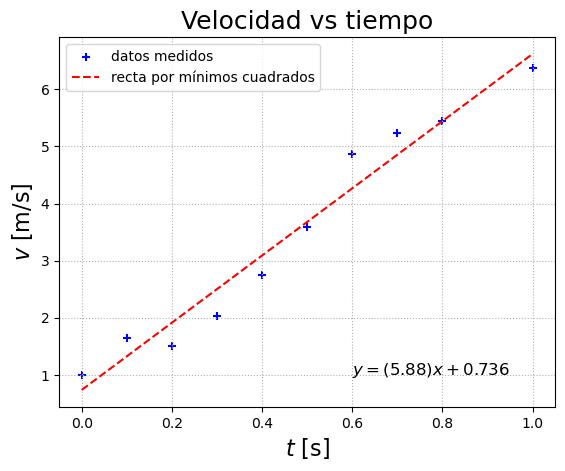

In [6]:
# La gráfica con los datos y la recta que mejor se ajusta 
y_pred= m_mc*xn + b_mc
# 
plt.figure()
plt.scatter(xn, yn, color='b',marker='+', label='datos medidos')
plt.plot(xn, y_pred, 'r--',label='recta por mínimos cuadrados')
plt.grid(linestyle='dotted')
plt.legend(loc='best')
plt.title(r'Velocidad vs tiempo', fontsize=18)
plt.xlabel(r'$t$ [s]', fontsize=16)
plt.ylabel(r'$v$ [m/s]', fontsize=16)
plt.text(0.6, 1.0, '$y=(5.88) x + 0.736$', fontsize=12)
plt.show()

In [7]:
SSE= np.sum((yn -(b_mc + m_mc*xn))**2)
Sy= np.sqrt(SSE/(n-2))
print('n=',n,',','SSE=', SSE ,',', 'Sy=',Sy)

n= 10 , SSE= 1.244265584415585 , Sy= 0.3943769745458628


In [8]:
Delta_m = np.sqrt(n/(n*np.sum(xn ** 2) - np.sum(xn)**2))*Sy
Delta_b = np.sqrt(np.sum(xn**2)/(n*np.sum(xn**2)-np.sum(xn)**2))*Sy
print(f'm = {np.round(m_mc, 1)} \u00B1 {np.round(Delta_m, 1)}')
print(f'b = {np.round(b_mc, 1)} \u00B1 {np.round(Delta_b, 1)}')

m = 5.9 ± 0.4
b = 0.7 ± 0.2


In [9]:
# Ajustar la recta por mínimos cuadrados usando linalg.lstsq
A = np.vstack([xn, np.ones(len(xn))]).T
m_c, b_c = np.linalg.lstsq(A, yn, rcond=None)[0]
print(f'm = {np.round(m_c, 1)}' )
print(f'b = {np.round(b_c, 1)}' )

m = 5.9
b = 0.7


In [10]:
import statsmodels.api as sm

m = 5.8844 ± 0.4103
b = 0.7362 ± 0.2262


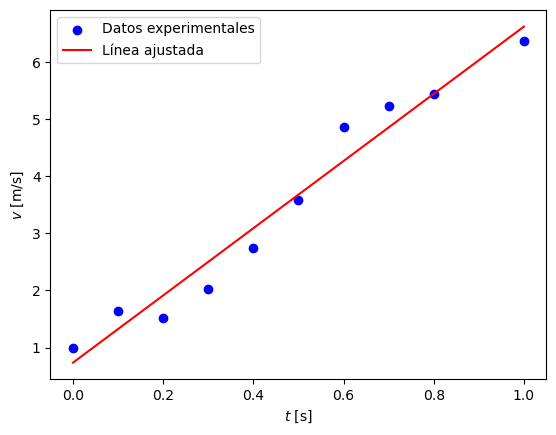

In [11]:
# Agregamos una constante (columna de unos) a xn
X = sm.add_constant(xn)
# Ajustamos el modelo
model = sm.OLS(yn, X).fit()
# Obtenemos los coeficientes y los errores estándar
b, m = model.params
Delta_b, Delta_m = model.bse
# Imprimimos los coeficientes y sus errores estándar
print(f'm = {m:.4f} \u00B1 {Delta_m:.4f}')
print(f'b = {b:.4f} \u00B1 {Delta_b:.4f}')
# Generamos valores de y usando los coeficientes obtenidos
y_pred = m * xn + b
# Graficamos los datos originales y la línea ajustada
plt.scatter(xn, yn, color='blue', label='Datos experimentales')
plt.plot(xn, y_pred, color='red', label='Línea ajustada')
plt.xlabel('$t$ [s]')
plt.ylabel('$v$ [m/s]')
plt.legend()
plt.show()

In [12]:
results = model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     205.7
Date:                Wed, 29 May 2024   Prob (F-statistic):           5.45e-07
Time:                        20:19:58   Log-Likelihood:                -3.7692
No. Observations:                  10   AIC:                             11.54
Df Residuals:                       8   BIC:                             12.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7362      0.226      3.254      0.0

/Users/hector/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Ejemplo 2

In [13]:
# Datos de cizallamiento y edad de la pega
yn = np.array([215.70, 167.15, 231.00, 206.30, 220.50,
               170.30, 178.70, 257.00, 235.90, 225.70,
               216.20, 239.55, 177.80, 233.75, 176.30,
               205.50, 241.40, 220.50, 265.20, 175.70])
xn = np.array([15.50, 23.75, 8.00, 17.00, 5.50, 19.00, 24.00, 2.50,
               7.50, 11.00, 13.00, 3.75, 25.00, 9.75, 22.00, 18.00,
               6.00, 12.50, 2.00, 21.50])

In [14]:
X = sm.add_constant(xn)
# Ajustamos el modelo
model = sm.OLS(yn, X).fit()
# Obtenemos los coeficientes y los errores estándar
b, m = model.params
Delta_b, Delta_m = model.bse
# Imprimimos los coeficientes y sus errores estándar
print(f'm = {m:.4f} \u00B1 {Delta_m:.4f}')
print(f'b = {b:.4f} \u00B1 {Delta_b:.4f}')

m = -3.7080 ± 0.2929
b = 262.5556 ± 4.4792


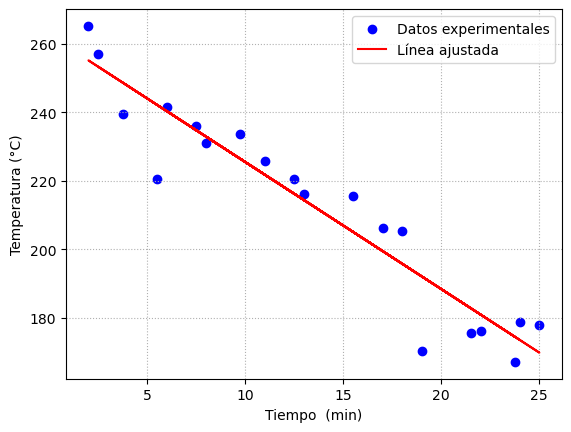

In [46]:
# Generamos valores de y usando los coeficientes obtenidos
y_pred = m * xn + b
# Graficamos los datos originales y la línea ajustada
plt.scatter(xn, yn, color='blue', label='Datos experimentales')
plt.plot(xn, y_pred, color='red', label='Línea ajustada')
plt.grid(linestyle='dotted')
plt.legend(loc='best')
plt.xlabel('Tiempo  (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

In [16]:
y_pred = m * xn + b
y_pred

array([205.08166021, 174.49069963, 232.89162438, 199.51966738,
       242.16161243, 192.10367694, 173.56370083, 253.2855981 ,
       234.74562199, 221.76763871, 214.35164827, 248.65060407,
       169.85570561, 226.40263274, 180.97969127, 195.81167216,
       240.30761482, 216.20564588, 255.13959571, 182.83368888])

In [17]:
Sum_y = np.sum(yn)
Sum_y 

4260.15

In [18]:
Sum_yp = np.sum(y_pred)
Sum_yp

4260.149999999997

In [19]:
e_i=yn-y_pred
e_i

array([ 10.61833979,  -7.34069963,  -1.89162438,   6.78033262,
       -21.66161243, -21.80367694,   5.13629917,   3.7144019 ,
         1.15437801,   3.93236129,   1.84835173,  -9.10060407,
         7.94429439,   7.34736726,  -4.67969127,   9.68832784,
         1.09238518,   4.29435412,  10.06040429,  -7.13368888])

In [20]:
np.sum(e_i)

2.9842794901924208e-12

In [21]:
# Los promedios de x y y 
xp= np.sum(xn)/len(xn) 
yp= np.sum(yn)/len(xn)
print(xp,',', yp,',', m * xp + b)

13.3625 , 213.0075 , 213.00749999999985


In [22]:
Sx2 = np.sum((xn-xp)**2)/n
Sy2 = np.sum((yn-yp)**2)/n
Sxy=np.sum((xn-xp)*(yn-yp))/n
m=Sxy/Sx2 
b=yp-m*xp
Sx2 , Sy2, Sxy, m, b

(110.65593750000001,
 1692.2956374999999,
 -410.31168749999995,
 -3.7079952216752936,
 262.5555861496361)

In [40]:
r=Sxy/(np.sqrt(Sx2)*np.sqrt(Sy2))
r, r**2

(-0.9481748013590833, 0.8990354539323371)

In [44]:
myx=r*np.sqrt(Sy2)/np.sqrt(Sx2)
mxy=r*np.sqrt(Sx2)/np.sqrt(Sy2)
myx,mxy

(-3.707995221675294, -0.24245863335448087)

In [24]:
np.sum(xn*e_i)

4.126832209294662e-11

In [25]:
np.sum(y_pred*e_i)

6.30961949354969e-10

In [26]:
results = model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     160.3
Date:                Wed, 29 May 2024   Prob (F-statistic):           2.12e-10
Time:                        20:19:59   Log-Likelihood:                -72.856
No. Observations:                  20   AIC:                             149.7
Df Residuals:                      18   BIC:                             151.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        262.5556      4.479     58.617      0.0

In [27]:
SS_T=np.sum(yn**2)-len(xn)*yp**2
SS_T

16922.95637499995

In [28]:
SS_R= SS_T - m*np.sum(yn*(xn-xp))
SS_R

1708.618608524679

In [29]:
s=SS_R/(len(xn)-2)
s

94.92325602914883

In [30]:
np.sqrt(np.sum(e_i**2)/(len(xn)-2))

9.742856666766263

In [31]:
np.sqrt(s*(1/len(xn)+xp**2/(np.sum((xn-xp)**2))))

4.479190743333357

In [32]:
np.sqrt(s/(np.sum((xn-xp)**2)) )

0.29288622903163347

In [33]:
xp**2

178.55640625

In [34]:
np.sum((xn-xp)**2)

1106.559375

In [35]:
from scipy import stats
# Sumas necesarias
n = len(xn)
sum_x = np.sum(xn)
sum_y = np.sum(yn)
sum_x2 = np.sum(xn**2)
sum_xy = np.sum(xn * yn)

# Calcular m y b
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
b = (sum_y * sum_x2 - sum_x * sum_xy) / (n * sum_x2 - sum_x**2)

# Predicciones
y_hat = m * xn + b

# Calcular SS_res y SS_tot
SS_res = np.sum((yn - y_hat)**2)
SS_tot = np.sum((yn - np.mean(yn))**2)

# Calcular R^2
R2 = 1 - (SS_res / SS_tot)

# Error estándar de los residuos
s = np.sqrt(SS_res / (n - 2))

# Varianza de los parámetros
sigma_m2 = np.sqrt(s**2 / np.sum((xn - np.mean(xn))**2))
sigma_b2 = np.sqrt(s**2 * (1/n + np.mean(xn)**2 / np.sum((xn - np.mean(xn))**2)))

# Estadísticos t
t_m = m / np.sqrt(sigma_m2)
t_b = b / np.sqrt(sigma_b2)

# Valores p
p_m = 2 * (1 - stats.t.cdf(np.abs(t_m), df=n-2))
p_b = 2 * (1 - stats.t.cdf(np.abs(t_b), df=n-2))

# Resultados
print(f"Pendiente (m): {m}")
print(f"Intercepto (b): {b}")
print(f"Coeficiente de determinación (R^2): {R2}")
print(f"Error estándar de los residuos: {s}")
print(f"Varianza de m: {sigma_m2}")
print(f"Varianza de b: {sigma_b2}")
print(f"t-m: {t_m}, p-m: {p_m}")
print(f"t-b: {t_b}, p-b: {p_b}")

Pendiente (m): -3.70799522167529
Intercepto (b): 262.55558614963604
Coeficiente de determinación (R^2): 0.8990354539323374
Error estándar de los residuos: 9.74285666676626
Varianza de m: 0.29288622903163797
Varianza de b: 4.479190743333427
t-m: -6.851563539337251, p-m: 2.06711620909239e-06
t-b: 124.05705988719458, p-b: 0.0


###  Ley de Enfriamiento de Newton. 

Pendiente: -3.7079952216752945
Intersección: 262.5555861496361
Coeficiente de determinación R^2: 0.8990354539323374
Valor p: 2.1207911050170543e-10
Error estándar: 0.292886229031638


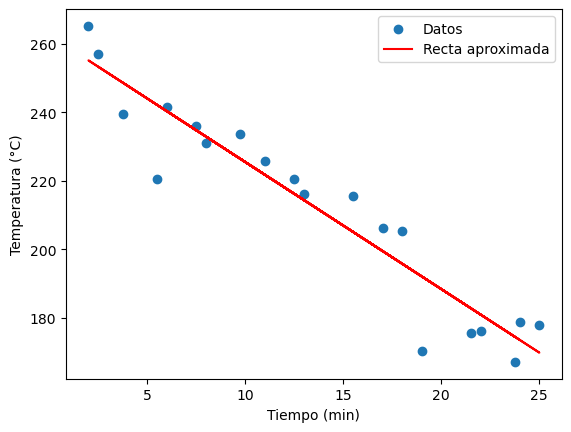

In [36]:
from scipy.stats import linregress

# Datos inventados
yn = np.array([215.70, 167.15, 231.00, 206.30, 220.50,
               170.30, 178.70, 257.00, 235.90, 225.70,
               216.20, 239.55, 177.80, 233.75, 176.30,
               205.50, 241.40, 220.50, 265.20, 175.70])
xn = np.array([15.50, 23.75, 8.00, 17.00, 5.50, 19.00, 24.00, 2.50,
               7.50, 11.00, 13.00, 3.75, 25.00, 9.75, 22.00, 18.00,
               6.00, 12.50, 2.00, 21.50])

# Realizar regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(xn, yn)

# Mostrar resultados
print(f'Pendiente: {slope}')
print(f'Intersección: {intercept}')
print(f'Coeficiente de determinación R^2: {r_value**2}')
print(f'Valor p: {p_value}')
print(f'Error estándar: {std_err}')

# Graficar resultados
plt.scatter(xn, yn, label='Datos')
plt.plot(xn, intercept + slope * xn, 'r', label='Recta aproximada')
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°C)')
#plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()


Pendiente: -3.7079952216752945
Intersección: 262.5555861496361
Coeficiente de determinación R^2: 0.8990354539323374
Valor p: 2.1207911050170543e-10
Error estándar: 0.292886229031638


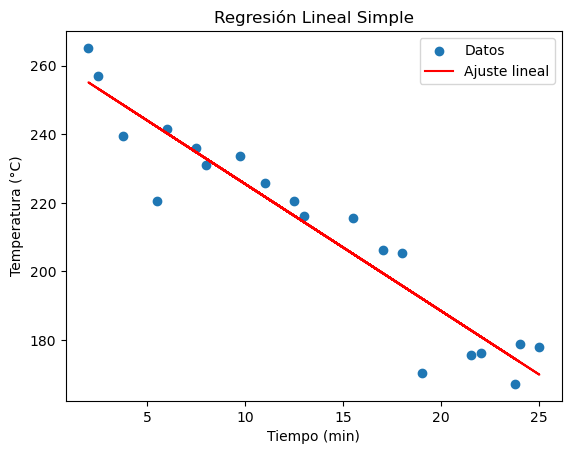

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Datos inventados
yn = np.array([215.70, 167.15, 231.00, 206.30, 220.50,
               170.30, 178.70, 257.00, 235.90, 225.70,
               216.20, 239.55, 177.80, 233.75, 176.30,
               205.50, 241.40, 220.50, 265.20, 175.70])
xn = np.array([15.50, 23.75, 8.00, 17.00, 5.50, 19.00, 24.00, 2.50,
               7.50, 11.00, 13.00, 3.75, 25.00, 9.75, 22.00, 18.00,
               6.00, 12.50, 2.00, 21.50])

# Realizar regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(xn, yn)

# Mostrar resultados
print(f'Pendiente: {slope}')
print(f'Intersección: {intercept}')
print(f'Coeficiente de determinación R^2: {r_value**2}')
print(f'Valor p: {p_value}')
print(f'Error estándar: {std_err}')

# Graficar resultados
plt.scatter(xn, yn, label='Datos')
plt.plot(xn, intercept + slope * xn, 'r', label='Ajuste lineal')
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°C)')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()


Temperatura ambiente (T_env): -102169.3920722447
Temperatura inicial (T_0): 262.56397236930246
Constante (k): 3.621680582219933e-05


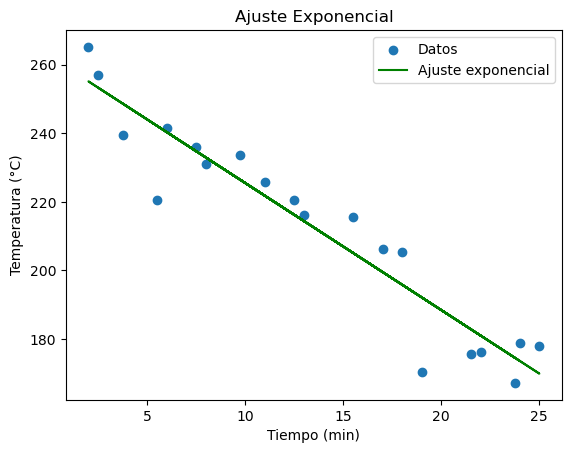

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

yn = np.array([215.70, 167.15, 231.00, 206.30, 220.50,
               170.30, 178.70, 257.00, 235.90, 225.70,
               216.20, 239.55, 177.80, 233.75, 176.30,
               205.50, 241.40, 220.50, 265.20, 175.70])
xn = np.array([15.50, 23.75, 8.00, 17.00, 5.50, 19.00, 24.00, 2.50,
               7.50, 11.00, 13.00, 3.75, 25.00, 9.75, 22.00, 18.00,
               6.00, 12.50, 2.00, 21.50])

# Modelo exponencial
def exponential_model(x, T_env, T_0, k):
    return T_env + (T_0 - T_env) * np.exp(-k * x)

# Ajuste exponencial con incremento de maxfev y ajuste de valores iniciales
try:
    params, covariance = curve_fit(
        exponential_model, xn, yn, p0=[1700, 2500, 0.01], maxfev=4000
    )
    T_env, T_0, k = params

    # Mostrar resultados
    print(f'Temperatura ambiente (T_env): {T_env}')
    print(f'Temperatura inicial (T_0): {T_0}')
    print(f'Constante (k): {k}')

    # Graficar resultados
    plt.scatter(xn, yn, label='Datos')
    plt.plot(xn, exponential_model(xn, T_env, T_0, k), 'g', label='Ajuste exponencial')
    plt.xlabel('Tiempo (min)')
    plt.ylabel('Temperatura (°C)')
    plt.title('Ajuste Exponencial')
    plt.legend()
    plt.show()
except RuntimeError as e:
    print(f"No se pudieron encontrar los parámetros óptimos: {e}")




Temperatura ambiente (T_env): -102169.3920722447
Temperatura inicial (T_0): 262.56397236930246
Constante (k): 3.621680582219933e-05


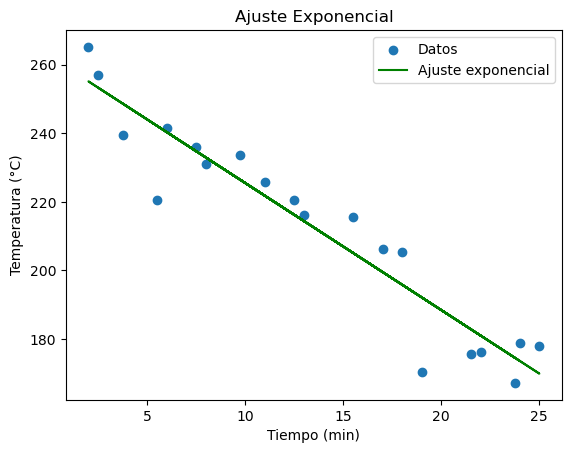

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos inventados
yn = np.array([215.70, 167.15, 231.00, 206.30, 220.50,
               170.30, 178.70, 257.00, 235.90, 225.70,
               216.20, 239.55, 177.80, 233.75, 176.30,
               205.50, 241.40, 220.50, 265.20, 175.70])
xn = np.array([15.50, 23.75, 8.00, 17.00, 5.50, 19.00, 24.00, 2.50,
               7.50, 11.00, 13.00, 3.75, 25.00, 9.75, 22.00, 18.00,
               6.00, 12.50, 2.00, 21.50])

# Modelo exponencial
def exponential_model(x, T_env, T_0, k):
    return T_env + (T_0 - T_env) * np.exp(-k * x)

# Ajuste exponencial con incremento de maxfev y ajuste de valores iniciales
params, covariance = curve_fit(
    exponential_model, xn, yn, p0=[1700, 2500, 0.01], maxfev=4000
)
T_env, T_0, k = params

# Mostrar resultados
print(f'Temperatura ambiente (T_env): {T_env}')
print(f'Temperatura inicial (T_0): {T_0}')
print(f'Constante (k): {k}')

# Graficar resultados
plt.scatter(xn, yn, label='Datos')
plt.plot(xn, exponential_model(xn, T_env, T_0, k), 'g', label='Ajuste exponencial')
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (°C)')
plt.title('Ajuste Exponencial')
plt.legend()
plt.show()
